In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100

In [13]:
red_wine=pd.read_csv('Wine Quality/winequality-red.csv')
red_wine = pd.read_csv('Wine Quality/winequality-red.csv',sep=';')

red_wine['quality_label'] = red_wine['quality'].apply(lambda x: 1
if x <= 5 else 2
if x <= 7 else 3)

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],categories=[1, 2,3])

X = red_wine
y = red_wine['quality_label']
X.drop(['quality_label','quality'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
##importing module
#from sklearn.preprocessing import MinMaxScaler
## creating normalization object 
#norm = MinMaxScaler()
## fit data
#norm_fit = norm.fit(X_train)
#new_xtrain = norm_fit.transform(X_train)
#new_xtest = norm_fit.transform(X_test)
## display values
#print(new_xtrain)

No, scaling is not necessary for random forests.

The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important

Scaling is done to Normalize data so that priority is not given to a particular feature. Role of Scaling is mostly important in algorithms that are distance based and require Euclidean Distance.

Random Forest is a tree-based model and hence does not require feature scaling.

This algorithm requires partitioning, even if you apply Normalization then also> the result would be the same.

In [34]:
#Create a function within many Machine Learning Models
def models1(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 10)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_test,y_test))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_test,y_test))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_test,y_test))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_test,y_test))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_test,y_test))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_test,y_test))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_test,y_test))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [35]:
models1(X_train,y_train)



[0]Logistic Regression Training Accuracy: 0.74375
[1]K Nearest Neighbor Training Accuracy: 0.6
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7375
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.609375
[4]Gaussian Naive Bayes Training Accuracy: 0.703125
[5]Decision Tree Classifier Training Accuracy: 0.696875
[6]Random Forest Classifier Training Accuracy: 0.775


(LogisticRegression(random_state=10),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

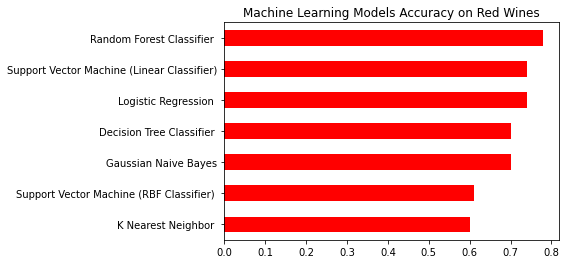

In [37]:

d = {'Logistic Regression ': [0.74],'K Nearest Neighbor ': [ 0.60],
'Support Vector Machine (Linear Classifier)': [0.74],'Support Vector Machine (RBF Classifier) ': [0.61], "Gaussian Naive Bayes": [0.70],
'Decision Tree Classifier ': [0.70], 'Random Forest Classifier ': [0.78]}
df = pd.DataFrame(data=d)
df=df.T


df.sort_values(0,ascending=True,inplace=True)
df.plot.barh(color= '#ff0000',title='Machine Learning Models Accuracy on Red Wines', legend=None)
import pandas as pd
  



## The Below code 27 is from the White wine Random forest. Apparently the code from this notebook shows that the random forest testing score is lower with the (n_estimators = 10, criterion = 'entropy', random_state = 0) than without. 

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = rfc.score(X_test, y_test)
print("The training accuracy for Random Forest is:", rfc.score(X_train, y_train)*100, "%")
print("The testing accuracy for Random Forest is:", rfc_acc * 100, "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 80.625 %


In [ ]:
#import matplotlib.pyplot as plt
#
#data = {'Logistic Regression Training Accuracy': 0.75,'K Nearest Neighbor Training Accuracy':  0.60,
#'Support Vector Machine (Linear Classifier) Accuracy': 0.74,'Support Vector Machine (RBF Classifier) Accuracy': 0.61,
#'Decision Tree Classifier Training Accuracy': 0.70, 'Random Forest Classifier Training Accuracy': 0.78}
#df = pd.DataFrame(data=d)
#
#names = list(data.keys())
#values = list(data.values())
#
#plt.barh(range(len(data)), values, tick_label=names)
#plt.show()
#
#

In [14]:
df

,0
K Nearest Neighbor,0.60
Support Vector Machine (RBF Classifier),0.61
Decision Tree Classifier,0.70
Support Vector Machine (Linear Classifier),0.74
Logistic Regression,0.75
Random Forest Classifier,0.78


In [ ]:
#import matplotlib.pyplot as plt
#import pandas as pd
#tr_acur = ['Logistic Regression Training Accuracy','K Nearest Neighbor Training Accuracy',
#'Support Vector Machine (RBF Classifier) Accuracy',
#'Decision Tree Classifier Training Accuracy', 'Random Forest Classifier Training Accuracy']
#acur=[0.75, 0.60, 0.61, 0.70, 0,78]
#df = pd.DataFrame({"Training Model":tr_acur,
#                  "Accuracy":acur})

Feature: 0, Score: 0.07151
Feature: 1, Score: 0.10607
Feature: 2, Score: 0.06765
Feature: 3, Score: 0.05860
Feature: 4, Score: 0.07137
Feature: 5, Score: 0.06105
Feature: 6, Score: 0.09952
Feature: 7, Score: 0.08445
Feature: 8, Score: 0.06911
Feature: 9, Score: 0.12162
Feature: 10, Score: 0.18904


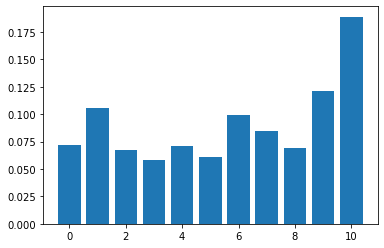

In [88]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [109]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [2]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

NameError: name 'X' is not defined

In [111]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=3, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7110694183864915


In [ ]:
## random forest for feature importance on a classification problem
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
#from matplotlib import pyplot
#
#
## define the model
#model = RandomForestClassifier()
## fit the model
#model.fit(X, y)
## get importance
#importance = model.feature_importances_
## summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
## plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [101]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [15]:
X.drop(['residual sugar','free sulfur dioxide'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


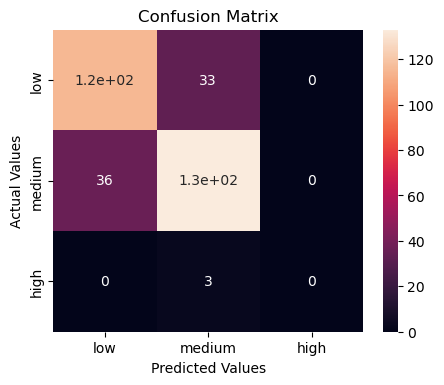

Accuracy score: 0.775
              precision    recall  f1-score   support

         low       0.76      0.78      0.77       148
      medium       0.79      0.79      0.79       169
        high       0.00      0.00      0.00         3

    accuracy                           0.78       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.77      0.78      0.77       320

Cohen-Kappa score: 0.5525431628828339


In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [116]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=3, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.6991869918699187


In [117]:
X

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [118]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [119]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [121]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.80625
[[117  31   0]
 [ 28 141   0]
 [  0   3   0]]


In [122]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [123]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 1350}

In [124]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.8125
[[119  29   0]
 [ 28 141   0]
 [  0   3   0]]


In [125]:

## evaluate a logistic regression model using repeated k-fold cross-validation
#from numpy import mean
#from numpy import std
#from sklearn.datasets import make_classification
#from sklearn.model_selection import RepeatedKFold
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
#
## prepare the cross-validation procedure
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
## create model
#
## evaluate model
#scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
## report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

>1 mean=0.8940 se=0.007
>2 mean=0.8920 se=0.006
>3 mean=0.8887 se=0.005
>4 mean=0.8835 se=0.005
>5 mean=0.8840 se=0.004
>6 mean=0.8830 se=0.004
>7 mean=0.8849 se=0.004
>8 mean=0.8844 se=0.004
>9 mean=0.8849 se=0.004
>10 mean=0.8849 se=0.003
>11 mean=0.8851 se=0.003
>12 mean=0.8843 se=0.003
>13 mean=0.8848 se=0.003
>14 mean=0.8853 se=0.003
>15 mean=0.8859 se=0.003


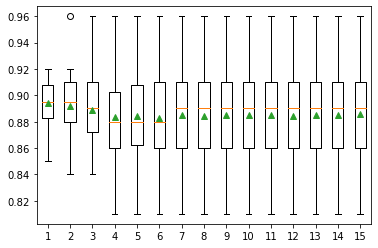

In [126]:

# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	
	# evaluate model
	scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [127]:
## random forest for feature importance on a classification problem
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
#from matplotlib import pyplot
#
#
## define the model
#model = RandomForestClassifier()
## fit the model
#model.fit(X, y)
## get importance
#importance = model.feature_importances_
## summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
## plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()